# Exploration des tables

In [1]:
import numpy as np
import pandas as pd
from mysql.connector import connect

In [2]:
mydb = connect(
  host="localhost",
  user="root",
  password="MySQL00x04.",
  database="retail_shake"
)
mycursor = mydb.cursor()

## Vue des tables

In [3]:
mycursor.execute("SHOW TABLES;")
mycursor.fetchall()

[('piwigo_retail_product_company',),
 ('piwigo_retail_product_company_price_changes',),
 ('piwigo_retail_product_company_rating_count_changes',),
 ('piwigo_retail_product_store',)]

## Pricing Query

In [5]:
mycursor.execute("""
SELECT DISTINCT prpcpc.product_company_id pc_id, gtin, prpcpc.price_after price, AVG(prpcpc.price_after) avg_price,
                DATE_FORMAT(prpcpc.change_date, '%Y-%c-%d') date
FROM piwigo_retail_product_company_price_changes AS prpcpc
    JOIN piwigo_retail_product_company AS prpc ON `product-company-id` = product_company_id
GROUP BY date, pc_id;
""")

df_pricing_change = pd.DataFrame (mycursor.fetchall(), columns = ['pc_id', 'gtin', 'price', 'avg_price', 'date'])
df_pricing_change['date'] = pd.to_datetime(df_pricing_change['date'])
print('DataFrame created !')


DataFrame created !


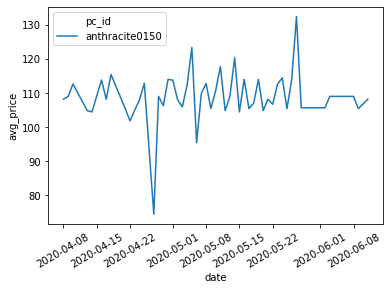

In [7]:
products = ['anthracite0150']
df_plot = df_pricing_change[df_pricing_change['pc_id'].isin(products)].sort_values('date')


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.lineplot(x = 'date', y = 'avg_price', data = df_plot, hue = 'pc_id')
plt.xticks(rotation = 30)
plt.show()
